In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

% matplotlib inline

In [5]:
pd.__version__

'0.19.2'

In [2]:
datasetFile = 'stroopdata.csv'
df = pd.read_csv(datasetFile)

In [6]:
df.agg(['mean', 'std', 'count']).round(decimals=2)

AttributeError: 'DataFrame' object has no attribute 'agg'

In [7]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [9]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [71]:
df.count()

Congruent      24
Incongruent    24
Difference     24
dtype: int64

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


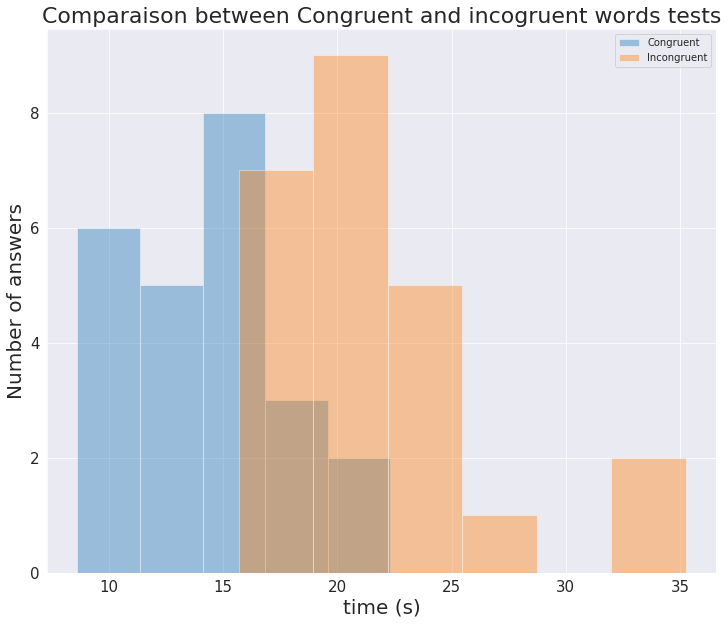

In [43]:
plt.figure(figsize=(12,10))

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

sns.set_style('darkgrid')
sns.distplot(df['Congruent'], label='Congruent', kde=False)
sns.distplot(df['Incongruent'].values, label='Incongruent', kde=False)

plt.xlabel('time (s)', fontsize=20)
plt.ylabel('Number of answers', fontsize=20)
plt.title('Comparaison between Congruent and incogruent words tests', fontsize=22)
plt.legend()

#plt.show()
plt.savefig('histograms.png')

In [19]:
Ave_Dev = df.agg(['mean', 'std', 'count'])

AttributeError: 'DataFrame' object has no attribute 'agg'

# Calculation of the mean difference

$$\overline{X}_D = \overline{X}_c - \overline{X}_i$$

In [59]:
X_D = df['Congruent'].mean() - df['Incongruent'].mean()
X_D

-7.964791666666665

# Calculation of the sample standard error

$$S_D = \sqrt{\frac{(\sum_{a=0}^{n}(((x_{c(a)} - x_{i(a))}) - \overline{X}_{diff})^2}{n - 1}}$$

In [68]:
df['Difference'] = df['Congruent'] - df['Incongruent']

In [69]:
Sample_Std_Error = math.sqrt((((df['Difference'] - df['Difference'].mean())**2).sum()) / (df['Difference'].count() - 1))
Sample_Std_Error

4.864826910359056

# Calculation of t

$$t_{statistical} = \frac{(\overline{X}_D - 0)}{S_D / \sqrt{n}}$$

In [70]:
t = (X_D)/(Sample_Std_Error/math.sqrt(df['Incongruent'].count()))
t

-8.020706944109955